In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import preprocessor as p
import seaborn as sns

/Users/chenluqi/anaconda3/envs/ml1/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:17: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Mapping, defaultdict


In [185]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
import statsmodels.api as sm
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from imblearn.over_sampling import SMOTE
from sklearn import preprocessing
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [186]:
ldata = pd.read_csv("smalldata.csv")
ldata = ldata.iloc[:, 1:] #delete first column
ldata_rc2  = ldata.drop(['created_at','retweet_count','favorite_count','text','clean_text','favorite>200'], axis=1)
ldata_rc2.head()

,is_popular,length,hashtag,mention,president,sentiment,subjectivity,readability
0,0,105.0,0.0,0.0,0.0,-0.233333,0.755556,5.1
1,0,115.0,0.0,0.0,0.0,0.216667,0.358333,11.8
2,0,180.0,0.0,0.0,0.0,-0.050000,0.600000,17.3
3,1,154.0,0.0,0.0,1.0,-0.100000,0.650000,12.2
4,1,277.0,0.0,0.0,0.0,0.166667,0.333333,12.4


In [187]:
data_withTFIDF = pd.read_csv("bigdata.csv")
data_withTFIDF = data_withTFIDF.iloc[:, 1:] #delete first column
cdata_rct=data_withTFIDF.drop(['created_at', 'favorite_count','text','retweet_count','clean_text','words','favorite>200'], axis=1)
cdata_rct.head()

,length,hashtag,mention,president,sentiment,subjectivity,readability,aaron,abaco,abandon,...,zhang,zimbabw,zimdancehal,zine,zoltan,zombi,zone,zoo,zuckerberg,retweet>100
0,105.0,0.0,0.0,0.0,-0.233333,0.755556,5.1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,115.0,0.0,0.0,0.0,0.216667,0.358333,11.8,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,180.0,0.0,0.0,0.0,-0.050000,0.600000,17.3,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,154.0,0.0,0.0,1.0,-0.100000,0.650000,12.2,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,277.0,0.0,0.0,0.0,0.166667,0.333333,12.4,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [188]:
# retweet: Logistic regression (calculated features + SMOTE + cross validation)

y = ldata_rc2['is_popular'] 
X = ldata_rc2.loc[:, ldata_rc2.columns != 'is_popular']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42) 

In [189]:
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)
logreg2 = LogisticRegression(C=1e90).fit(X_train_res, y_train_res)

In [190]:
coef = pd.Series(logreg2.coef_[0], index = X_train.columns)
imp_coef1 = pd.concat([coef.sort_values().head(5),
                     coef.sort_values().tail(2)])

In [191]:
type(imp_coef1)

pandas.core.series.Series

In [192]:
# retweet: Logistic regression (all features + RFE + SMOTE + cross validation)
y = cdata_rct["retweet>100"]
X = cdata_rct.loc[:, cdata_rct.columns != 'retweet>100']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42) 

In [193]:
logreg = LogisticRegression(C=1e90).fit(X_train, y_train)
select = RFE(logreg,1000, step=100) # step tells RFE how many features to remove each time model features are evaluated
selector = select.fit(X_train, y_train) # fit RFE estimator.
Xnew = selector.transform(X_train) #reduces X to subset identified above
Xnew.shape

(1650, 1000)

In [194]:
logregnew = LogisticRegression(C=1e90).fit(Xnew, y_train)

In [195]:
coef = pd.Series(logregnew.coef_[0], index = X_train.columns[selector.get_support()])
imp_coef2 = pd.concat([coef.sort_values().head(10),
                     coef.sort_values().tail(10)])

In [196]:
type(imp_coef2)

pandas.core.series.Series

In [198]:
# favorite: Logistic regression (calculated features + SMOTE + cross validation)
data_like = pd.read_csv("smalldata.csv")
data_like = data_like.iloc[:, 1:] #delete first column
cdata_lc  = data_like.drop(['created_at','retweet_count','favorite_count','text','clean_text','retweet>100'], axis=1)

In [199]:
cdata_lc.head()

,length,hashtag,mention,president,sentiment,subjectivity,readability,is_liked
0,105.0,0.0,0.0,0.0,-0.233333,0.755556,5.1,0
1,115.0,0.0,0.0,0.0,0.216667,0.358333,11.8,0
2,180.0,0.0,0.0,0.0,-0.050000,0.600000,17.3,0
3,154.0,0.0,0.0,1.0,-0.100000,0.650000,12.2,1
4,277.0,0.0,0.0,0.0,0.166667,0.333333,12.4,1


In [200]:
y = cdata_lc['is_liked'] 
X = cdata_lc.loc[:, cdata_lc.columns != 'is_liked']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42) 

In [201]:
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)
logreg2 = LogisticRegression(C=1e90).fit(X_train_res, y_train_res)

In [202]:
coef = pd.Series(logreg2.coef_[0], index = X_train.columns)
imp_coef3 = pd.concat([coef.sort_values().head(5),
                     coef.sort_values().tail(2)])

In [205]:
# favorite: Logistic regression (all features + RFE + SMOTE + cross validation)
cdata_lct=data_withTFIDF.drop(['created_at', 'favorite_count','text','retweet_count','clean_text','words','retweet>100'], axis=1)
cdata_lct.head()

,length,hashtag,mention,president,sentiment,subjectivity,readability,aaron,abaco,abandon,...,zhang,zimbabw,zimdancehal,zine,zoltan,zombi,zone,zoo,zuckerberg,favorite>200
0,105.0,0.0,0.0,0.0,-0.233333,0.755556,5.1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,115.0,0.0,0.0,0.0,0.216667,0.358333,11.8,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,180.0,0.0,0.0,0.0,-0.050000,0.600000,17.3,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,154.0,0.0,0.0,1.0,-0.100000,0.650000,12.2,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,277.0,0.0,0.0,0.0,0.166667,0.333333,12.4,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [212]:
y = cdata_lct["favorite>200"]
X = cdata_lct.loc[:, cdata_lct.columns != 'favorite>200']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42) 

In [213]:
logreg = LogisticRegression(C=1e90).fit(X_train, y_train)
select = RFE(logreg,1000, step=100) 
selector = select.fit(X_train, y_train)  

In [214]:
Xnew = selector.transform(X_train) #reduces X to subset identified above
Xnew.shape

(1650, 1000)

In [215]:
logregnew = LogisticRegression(C=1e90).fit(Xnew, y_train)

In [216]:
coef = pd.Series(logregnew.coef_[0], index = X_train.columns[selector.get_support()])
imp_coef4 = pd.concat([coef.sort_values().head(10),
                     coef.sort_values().tail(10)])

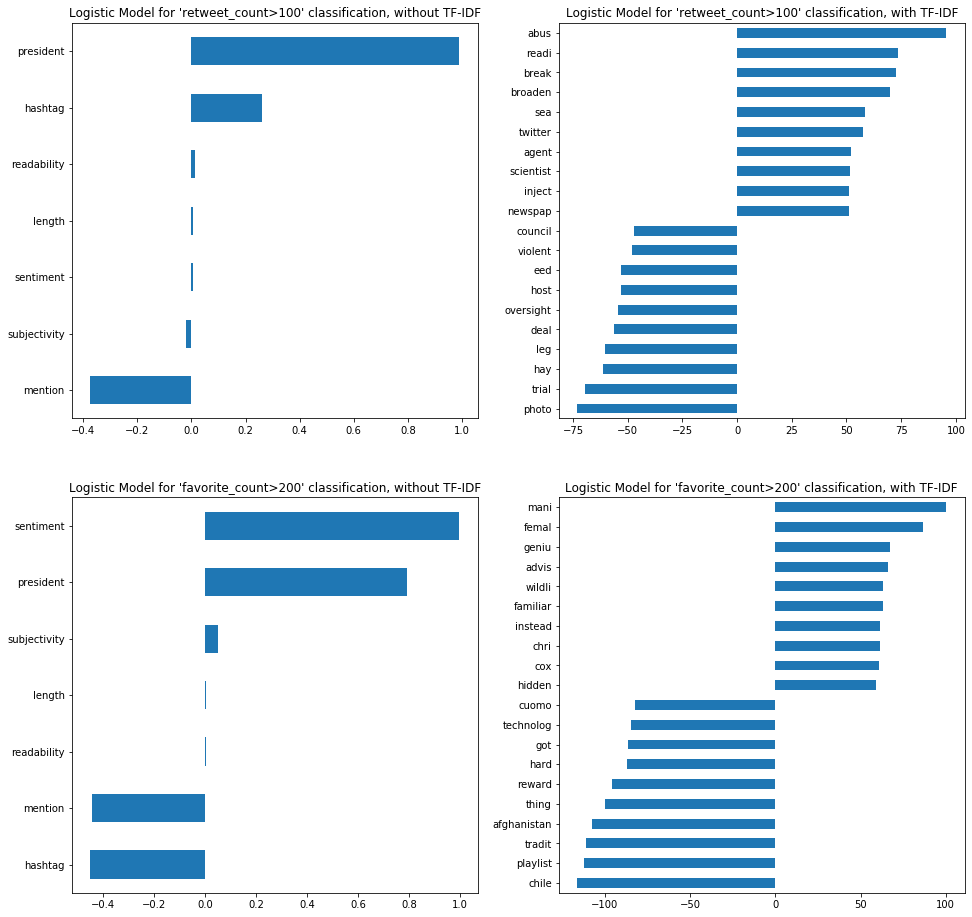

In [222]:
fig = plt.figure(figsize=(16,16))
plt.subplots_adjust(wspace = 0.2)
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)
ax1.set_title("Logistic Model for 'retweet_count>100' classification, without TF-IDF")
ax2.set_title("Logistic Model for 'retweet_count>100' classification, with TF-IDF")
ax3.set_title("Logistic Model for 'favorite_count>200' classification, without TF-IDF")
ax4.set_title("Logistic Model for 'favorite_count>200' classification, with TF-IDF")
imp_coef1.plot(kind='barh', ax=ax1)
imp_coef2.plot(kind='barh', ax=ax2)
imp_coef3.plot(kind='barh', ax=ax3)
imp_coef4.plot(kind='barh', ax=ax4)

In [225]:
result1=pd.read_csv("result1.csv")
result2=pd.read_csv("result2.csv")
result3=pd.read_csv("result3.csv")
result4=pd.read_csv("result4.csv")

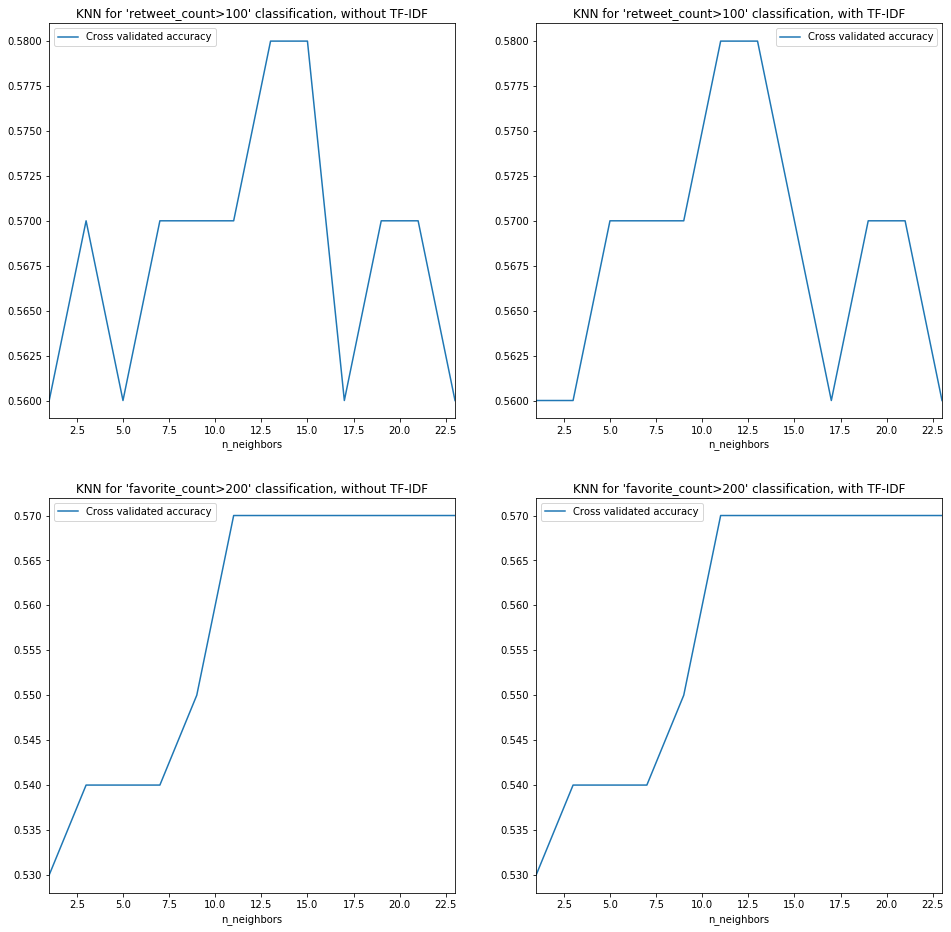

In [227]:
fig = plt.figure(figsize=(16,16))
plt.subplots_adjust(wspace = 0.2)
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)
ax1.set_title("KNN for 'retweet_count>100' classification, without TF-IDF")
ax2.set_title("KNN for 'retweet_count>100' classification, with TF-IDF")
ax3.set_title("KNN for 'favorite_count>200' classification, without TF-IDF")
ax4.set_title("KNN for 'favorite_count>200' classification, with TF-IDF")
result1.plot(kind='line',x='n_neighbors',y='Cross validated accuracy',ax=ax1)
result2.plot(kind='line',x='n_neighbors',y='Cross validated accuracy',ax=ax2)
result3.plot(kind='line',x='n_neighbors',y='Cross validated accuracy',ax=ax3)
result4.plot(kind='line',x='n_neighbors',y='Cross validated accuracy',ax=ax4)

In [229]:
# retweet: Random Forest (calculated features + SMOTE + cross validation)
from sklearn.ensemble import RandomForestClassifier
y = ldata_rc2['is_popular'] 
X = ldata_rc2.loc[:, ldata_rc2.columns != 'is_popular']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42) 

/Users/chenluqi/anaconda3/envs/ml1/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [230]:
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)
RF100 = RandomForestClassifier(random_state = 42,n_estimators=100).fit(X_train_res, y_train_res)
coef = pd.Series(RF100.feature_importances_, index = X_train.columns)
coef

length          0.277690
hashtag         0.004529
mention         0.019830
president       0.051681
sentiment       0.199590
subjectivity    0.190096
readability     0.256584
dtype: float64

In [231]:
imp_coef5 = pd.concat([coef.sort_values().head(5),
                     coef.sort_values().tail(2)])

In [232]:
# retweet: Random Forest (all features + RFE + SMOTE + cross validation)
y = cdata_rct["retweet>100"]
X = cdata_rct.loc[:, cdata_rct.columns != 'retweet>100']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42) 

In [233]:
rf50 = RandomForestClassifier(random_state = 42,n_estimators=50).fit(X_train, y_train)
select = RFE(rf50,1000, step=100) 
selector = select.fit(X_train, y_train) 
Xnew = selector.transform(X_train)

RF50 = RandomForestClassifier(random_state = 42,n_estimators=50).fit(Xnew, y_train)
coef = pd.Series(RF50.feature_importances_, index = X_train.columns[selector.get_support()])
coef

length          0.032215
mention         0.001720
president       0.007231
sentiment       0.012781
subjectivity    0.014091
                  ...   
york            0.002689
young           0.001860
your            0.001247
youth           0.000422
zealand         0.000098
Length: 1000, dtype: float64

In [234]:
imp_coef6 = pd.concat([coef.sort_values().tail(20),
                     coef.sort_values().head(0)])

In [235]:
#favorite: Random Forest (calculated features + SMOTE + cross validation)
y = cdata_lc['is_liked'] 
X = cdata_lc.loc[:, cdata_lc.columns != 'is_liked']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42) 

In [236]:
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)
RF150 = RandomForestClassifier(random_state = 42,n_estimators=150).fit(X_train_res, y_train_res)
coef = pd.Series(RF150.feature_importances_, index = X_train.columns)
coef

length          0.279421
hashtag         0.004154
mention         0.017990
president       0.036988
sentiment       0.199920
subjectivity    0.199688
readability     0.261839
dtype: float64

In [237]:
imp_coef7 = pd.concat([coef.sort_values().head(5),
                     coef.sort_values().tail(2)])

In [238]:
# favorite: Random Forest (all features + RFE + SMOTE + cross validation)
y = cdata_lct["favorite>200"]
X = cdata_lct.loc[:, cdata_lct.columns != 'favorite>200']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42) 

In [239]:
rf150 = RandomForestClassifier(random_state = 42,n_estimators=150).fit(X_train, y_train)
select = RFE(rf150,1000, step=100) 
selector = select.fit(X_train, y_train) 
Xnew = selector.transform(X_train)

RF150 = RandomForestClassifier(random_state = 42,n_estimators=150).fit(Xnew, y_train)
coef = pd.Series(RF150.feature_importances_, index = X_train.columns[selector.get_support()])
coef

length       0.029488
hashtag      0.000809
mention      0.003501
president    0.004964
sentiment    0.021056
               ...   
york         0.004142
yorker       0.000432
young        0.000763
your         0.000361
zelenski     0.000441
Length: 1000, dtype: float64

In [240]:
imp_coef8 = pd.concat([coef.sort_values().tail(20),
                     coef.sort_values().head(0)])

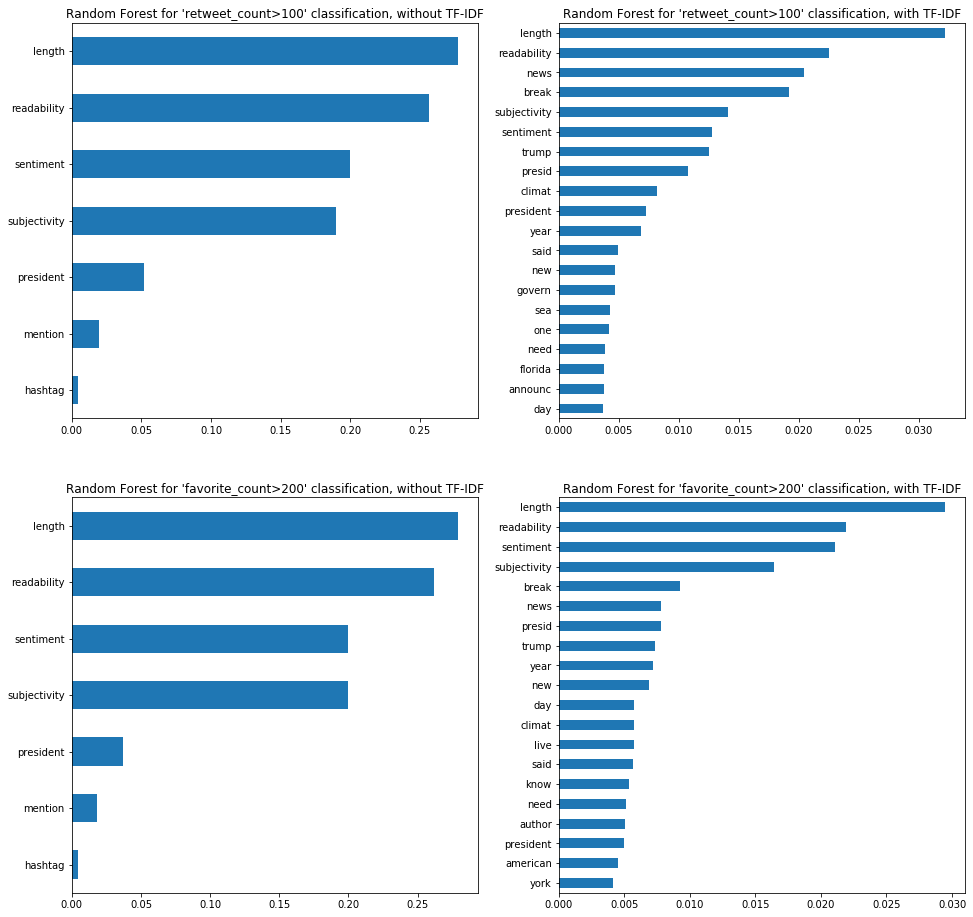

In [242]:
fig = plt.figure(figsize=(16,16))
plt.subplots_adjust(wspace = 0.2)
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)
ax1.set_title("Random Forest for 'retweet_count>100' classification, without TF-IDF")
ax2.set_title("Random Forest for 'retweet_count>100' classification, with TF-IDF")
ax3.set_title("Random Forest for 'favorite_count>200' classification, without TF-IDF")
ax4.set_title("Random Forest for 'favorite_count>200' classification, with TF-IDF")
imp_coef5.plot(kind='barh', ax=ax1)
imp_coef6.plot(kind='barh', ax=ax2)
imp_coef7.plot(kind='barh', ax=ax3)
imp_coef8.plot(kind='barh', ax=ax4)